# Assignment-02 MD Rashadul Islam 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

Importing Library

In [7]:
df = pd.read_csv('Height-Weight Data.csv')

In [8]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [9]:
df.head(2)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [10]:
df.Height

0       73.847017
1       68.781904
2       74.110105
3       71.730978
4       69.881796
          ...    
3496    69.296830
3497    70.542201
3498    73.912549
3499    67.396021
3500    72.738970
Name: Height, Length: 3501, dtype: float64

In [ ]:
#df['weight']

In [12]:
df.shape

(3501, 2)

In [13]:
row, col = df.shape

In [14]:
row

3501

In [15]:
col

2

In [16]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [17]:
df[25:30] # specific num of rows

,Height,Weight
25,68.144033,192.343977
26,69.089631,184.435174
27,72.800844,206.828189
28,67.421242,175.213922
29,68.496415,154.342639


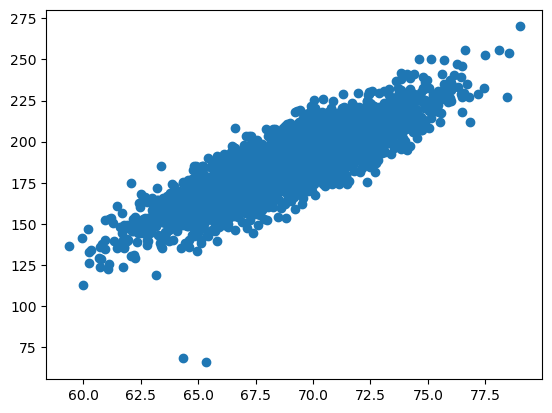

In [18]:
plt.scatter(df.Height , df.Weight)

Text(0.5, 1.0, 'Height-Weight Data')

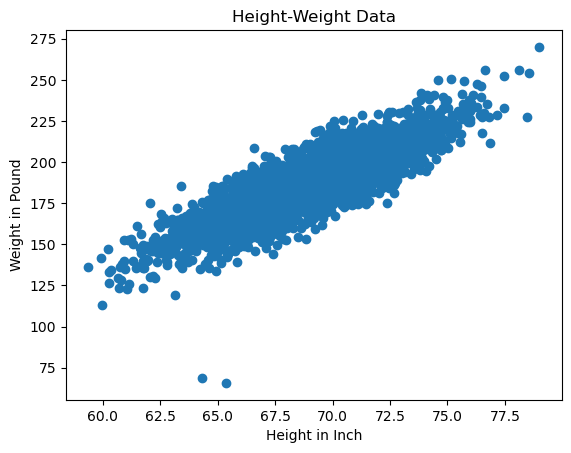

In [19]:
plt.scatter(df[['Height']] , df[['Weight']]) 
plt.ylabel('Weight in Pound')
plt.xlabel('Height in Inch')
plt.title('Height-Weight Data')

Text(0.5, 1.0, 'Height-Weight Data')

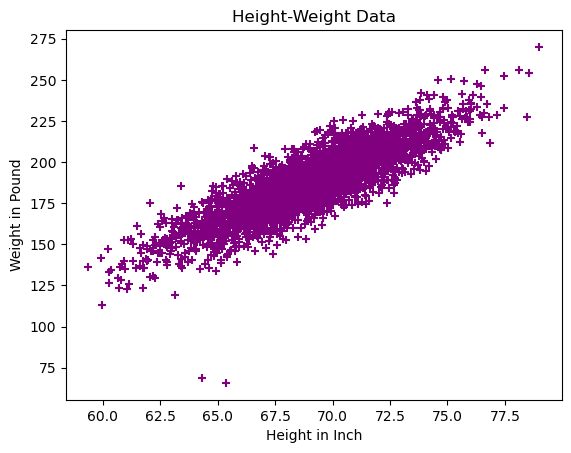

In [20]:
plt.scatter(df[['Height']] , df[['Weight']], color='Purple', marker='+')
plt.ylabel('Weight in Pound')
plt.xlabel('Height in Inch')
plt.title('Height-Weight Data')

In [21]:
df.Height.mean()

69.02441087268781

In [22]:
df.Weight.mean()

186.891257979463

In [23]:
#x = df[['Height']] #2d
y = df[['Weight']]

In [24]:
x = df.drop('Weight', axis=1) #axis=1 means column, 0 means row

In [25]:
x.head() 

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [26]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [27]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [28]:
#splitting dataset into train and test set
from sklearn.model_selection import train_test_split as tts

In [29]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=0.33, random_state=1)

In [30]:
xtrain.head()

,Height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [31]:
ytrain.head()

,Weight
166,162.779583
1011,185.842622
1344,179.115883
1563,188.656335
476,176.141239


In [32]:
xtest.head()

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [33]:
ytest.head()

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


# Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
reg = LinearRegression() # creating linear regression object

In [37]:
reg.fit(xtrain, ytrain) #training model

LinearRegression()

In [38]:
reg.predict([[2000]])

array([[11669.78254752]])

In [39]:
#df[20:50]

In [40]:
m = reg.coef_

In [41]:
c = reg.intercept_

In [42]:
c

array([-223.73384719])

In [43]:
m

array([[5.9467582]])

In [44]:
predicted = (m*2000) + c
predicted

array([[11669.78254752]])

In [45]:
reg.predict([[2000]])

array([[11669.78254752]])

In [46]:
reg.predict(xtest)

array([[177.09443165],
       [189.92284867],
       [167.62178605],
       ...,
       [179.20146692],
       [198.1912708 ],
       [190.70609708]])

In [47]:
df2 = df.copy()

In [48]:
df2.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [51]:
df2['predicted'] = reg.predict(df[['Height']])

In [52]:
df2.head()

,Height,Weight,predicted
0,73.847017,241.893563,215.416507
1,68.781904,162.310473,185.295505
2,74.110105,212.740856,216.981030
3,71.730978,220.042470,202.832937
4,69.881796,206.349801,191.836295


In [51]:
#df2

In [53]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


# Best fit line

Text(0.5, 1.0, 'Height-Weight Data')

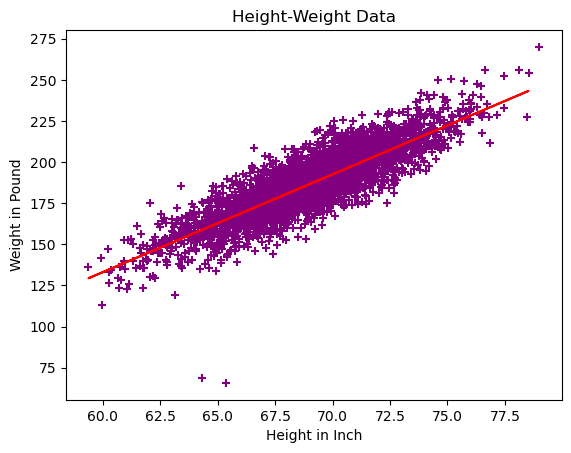

In [54]:
plt.scatter(df[['Height']] , df[['Weight']], color='purple', marker='+')
plt.plot(xtest, reg.predict(xtest), color='red') # reg.predict(xtest) = m*xtest + c
plt.ylabel('Weight in Pound')
plt.xlabel('Height in Inch')
plt.title('Height-Weight Data')

Text(0.5, 1.0, 'Height-Weight Data')

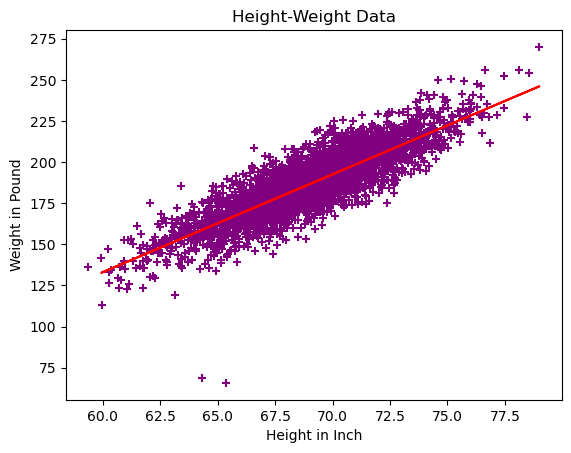

In [55]:
plt.scatter(df[['Height']] , df[['Weight']], color='purple', marker='+')
plt.plot(xtrain, reg.predict(xtrain), color='red')
plt.ylabel('Weight in Pound')
plt.xlabel('Height in Inch')
plt.title('Height-Weight Data')

In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [57]:
#testing MSE
test_mse = mean_squared_error(ytest, reg.predict(xtest)) #ytest is actual y, reg.predict(xtest) is actually predicted y
test_mse

111.14654406073984

In [58]:
#testing MAE
test_mse = mean_absolute_error(ytest, reg.predict(xtest))
test_mse

8.29430074943638

In [59]:
#trainin MSE
train_mse = mean_squared_error(ytrain, reg.predict(xtrain))
train_mse

103.48759292384861

In [60]:
#trainin MAE
train_mse = mean_absolute_error(ytrain, reg.predict(xtrain))
train_mse

7.9554884524224185

Comments of this dataset training will be updated on upcomming days.